In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def carregar_imagem():
    img = cv.imread("../src/tennisball.jpg")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)
    return img

def mostrar_imagem(img, titulo):
    plt.imshow(img)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Questão 1

In [3]:
img = carregar_imagem()

# Função para criar uma janela de trackbars
def empty(a):
    pass

# +==+==+==+==+==+ Color Detection +==+==+==+==+==+ //
hMin = 0
sMin = 0
vMin = 0
hMax = 179
sMax = 255
vMax = 255

# Converte a imagem para o espaço de cor HSV
imgHSV = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# Cria a janela com trackbars
cv.namedWindow("Trackbars", cv.WINDOW_NORMAL)
cv.createTrackbar("Hue Min", "Trackbars", hMin, 179, empty)
cv.createTrackbar("Hue Max", "Trackbars", hMax, 179, empty)
cv.createTrackbar("Sat Min", "Trackbars", sMin, 255, empty)
cv.createTrackbar("Sat Max", "Trackbars", sMax, 255, empty)
cv.createTrackbar("Val Min", "Trackbars", vMin, 255, empty)
cv.createTrackbar("Val Max", "Trackbars", vMax, 255, empty)

while True:
    # Atualiza os valores dos trackbars
    hMin = cv.getTrackbarPos("Hue Min", "Trackbars")
    hMax = cv.getTrackbarPos("Hue Max", "Trackbars")
    sMin = cv.getTrackbarPos("Sat Min", "Trackbars")
    sMax = cv.getTrackbarPos("Sat Max", "Trackbars")
    vMin = cv.getTrackbarPos("Val Min", "Trackbars")
    vMax = cv.getTrackbarPos("Val Max", "Trackbars")

    # Define os limites inferior e superior da máscara
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Cria a máscara que destaca as cores dentro do intervalo definido
    mask = cv.inRange(imgHSV, lower, upper)

    # Mostra as imagens: original, HSV e a máscara
    cv.imshow("Image", img)
    cv.imshow("Image Mask", mask)

    # Saída do loop com tecla 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Fecha as janelas
cv.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kaio/.local/lib/python3.10/site-packages/cv2/qt/plugins"


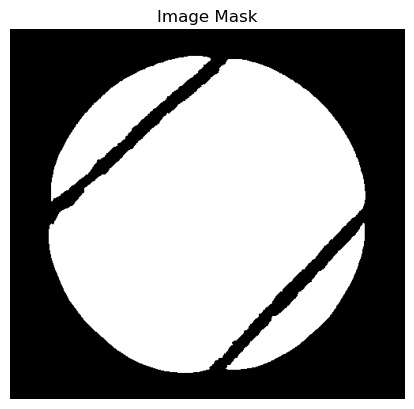

In [4]:
lower = np.array([32, 71, 0])
upper = np.array([179, 255, 255])
mask = cv.inRange(imgHSV, lower, upper)


plt.imshow(mask, cmap='gray')
plt.title('Image Mask')
plt.axis('off')
plt.show()

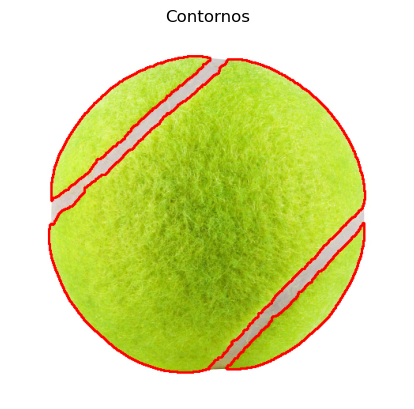

In [5]:
img = carregar_imagem()
contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_contours = cv.drawContours(img, contours, -1, (255, 0, 0), 2)

mostrar_imagem(img_contours, 'Contornos')

# Questão 2

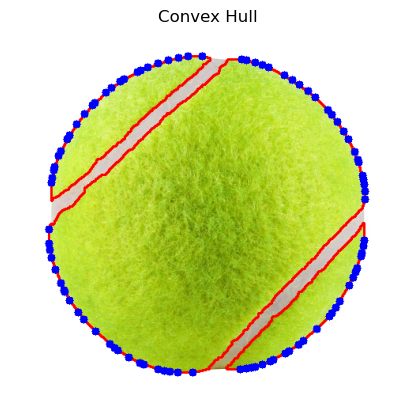

In [6]:
combined_contours = np.vstack(contours)
convex_hull = cv.convexHull(combined_contours)

for point in convex_hull:
        x, y = point[0]
        cv.circle(img_contours, (x, y), 5, (0, 0, 255), -1)

mostrar_imagem(img_contours, 'Convex Hull')

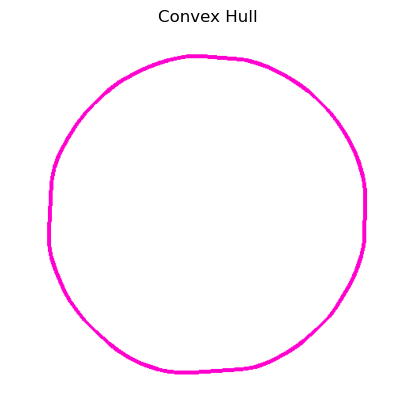

In [7]:
img = carregar_imagem()
img_branca = np.ones_like(img) * 255
img_convex = cv.polylines(img_branca, [convex_hull], True, (255, 0, 207), 3)

mostrar_imagem(img_convex, 'Convex Hull')